In [1]:
from pszt import net
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Sieć pierwsza bag-of-words

In [2]:
x = np.load('x_train_no_ignore_no_norm.npy')
y_true = np.load('y_train_no_ignore_no_norm.npy')

In [3]:
# Create a random order to shuffle the dataset.
s = np.arange(x.shape[0])
np.random.shuffle(s)

# Split dataset into k folds.
x_folds = np.array_split(x[s], 5)
y_folds = np.array_split(y_true[s], 5)

x_train = np.concatenate(np.delete(x_folds, 1))
y_train = np.concatenate(np.delete(y_folds, 1))

x_test = x_folds[1]
y_test = y_folds[1]

In [4]:
mlp = net.MLP()

mlp.add_layer(input_dim=x_train.shape[1], output_dim=50, activation="relu")

mlp.add_layer(input_dim=50, output_dim=3, activation="softmax")
mlp.print_layers()

1. Layer - input_dim: 8257, output_dim: 50, activation: relu
2. Layer - input_dim: 50, output_dim: 3, activation: softmax


In [5]:
mlp.init_layers()

In [6]:
mlp.train_batch_with_test(x=x_train, y_true=y_train, x_test=x_test, y_test=y_test, epochs=200, batch_size=256)

Epoch: 1, loss_train: 2928.74, accuracy_train: 56.6%
	  loss_test: 721.35, accuracy_test: 57.7%
Epoch: 2, loss_train: 2842.25, accuracy_train: 56.6%
	  loss_test: 694.22, accuracy_test: 57.7%
Epoch: 3, loss_train: 2759.27, accuracy_train: 56.6%
	  loss_test: 669.26, accuracy_test: 57.7%
Epoch: 4, loss_train: 2654.68, accuracy_train: 56.6%
	  loss_test: 639.71, accuracy_test: 57.7%
Epoch: 5, loss_train: 2565.83, accuracy_train: 57.2%
	  loss_test: 615.64, accuracy_test: 58.5%
Epoch: 6, loss_train: 2498.55, accuracy_train: 67.9%
	  loss_test: 598.38, accuracy_test: 70.0%
Epoch: 7, loss_train: 2445.50, accuracy_train: 67.7%
	  loss_test: 585.76, accuracy_test: 71.9%
Epoch: 8, loss_train: 2399.34, accuracy_train: 68.0%
	  loss_test: 575.87, accuracy_test: 71.7%
Epoch: 9, loss_train: 2355.19, accuracy_train: 68.9%
	  loss_test: 567.49, accuracy_test: 72.4%
Epoch: 10, loss_train: 2311.33, accuracy_train: 69.7%
	  loss_test: 560.06, accuracy_test: 72.7%
Epoch: 11, loss_train: 2267.18, accurac

Epoch: 86, loss_train: 446.58, accuracy_train: 95.8%
	  loss_test: 521.79, accuracy_test: 74.8%
Epoch: 87, loss_train: 446.97, accuracy_train: 95.8%
	  loss_test: 523.85, accuracy_test: 74.6%
Epoch: 88, loss_train: 439.57, accuracy_train: 95.8%
	  loss_test: 524.96, accuracy_test: 74.8%
Epoch: 89, loss_train: 441.23, accuracy_train: 95.8%
	  loss_test: 526.95, accuracy_test: 74.8%
Epoch: 90, loss_train: 433.83, accuracy_train: 95.9%
	  loss_test: 528.23, accuracy_test: 74.8%
Epoch: 91, loss_train: 435.52, accuracy_train: 95.8%
	  loss_test: 530.46, accuracy_test: 74.6%
Epoch: 92, loss_train: 428.18, accuracy_train: 95.9%
	  loss_test: 531.28, accuracy_test: 74.9%
Epoch: 93, loss_train: 429.80, accuracy_train: 95.8%
	  loss_test: 533.67, accuracy_test: 74.5%
Epoch: 94, loss_train: 422.26, accuracy_train: 95.9%
	  loss_test: 534.31, accuracy_test: 74.8%
Epoch: 95, loss_train: 423.96, accuracy_train: 95.8%
	  loss_test: 536.81, accuracy_test: 74.4%
Epoch: 96, loss_train: 417.25, accuracy_

Epoch: 171, loss_train: 320.73, accuracy_train: 96.5%
	  loss_test: 608.96, accuracy_test: 75.4%
Epoch: 172, loss_train: 320.48, accuracy_train: 96.5%
	  loss_test: 609.21, accuracy_test: 75.3%
Epoch: 173, loss_train: 320.05, accuracy_train: 96.5%
	  loss_test: 609.72, accuracy_test: 75.3%
Epoch: 174, loss_train: 320.06, accuracy_train: 96.5%
	  loss_test: 610.36, accuracy_test: 75.3%
Epoch: 175, loss_train: 319.59, accuracy_train: 96.5%
	  loss_test: 610.83, accuracy_test: 75.3%
Epoch: 176, loss_train: 319.13, accuracy_train: 96.5%
	  loss_test: 611.38, accuracy_test: 75.3%
Epoch: 177, loss_train: 318.54, accuracy_train: 96.5%
	  loss_test: 611.95, accuracy_test: 75.3%
Epoch: 178, loss_train: 318.17, accuracy_train: 96.5%
	  loss_test: 612.35, accuracy_test: 75.3%
Epoch: 179, loss_train: 317.23, accuracy_train: 96.5%
	  loss_test: 612.79, accuracy_test: 75.4%
Epoch: 180, loss_train: 317.18, accuracy_train: 96.5%
	  loss_test: 613.29, accuracy_test: 75.3%
Epoch: 181, loss_train: 316.70

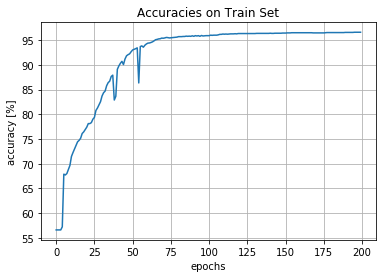

In [9]:
accuracies_train = [x[0] for x in mlp.accuracies]

fig, ax = plt.subplots()
ax.plot(accuracies_train)

ax.set(xlabel='epochs', ylabel='accuracy [%]', title='Accuracies on Train Set')
ax.grid()

plt.show()

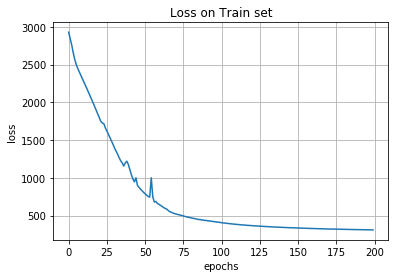

In [13]:
loss_train = [x[0] for x in mlp.losses]

fig, ax = plt.subplots()
ax.plot(loss_train)

ax.set(xlabel='epochs', ylabel='loss', title='Loss on Train set')
ax.grid()

plt.show()

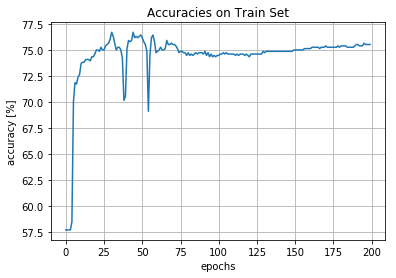

In [14]:
accuracies_test = [x[1] for x in mlp.accuracies]

fig, ax = plt.subplots()
ax.plot(accuracies_test)

ax.set(xlabel='epochs', ylabel='accuracy [%]', title='Accuracies on Train Set')
ax.grid()

plt.show()

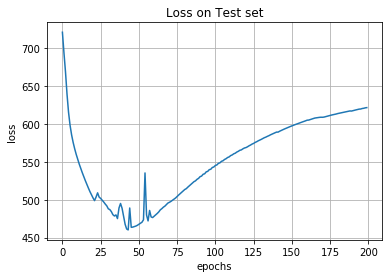

In [15]:
loss_test = [x[1] for x in mlp.losses]

fig, ax = plt.subplots()
ax.plot(loss_test)

ax.set(xlabel='epochs', ylabel='loss', title='Loss on Test set')
ax.grid()

plt.show()

# Sieć druga - TFIDF

In [16]:
x = np.load('x_tfidf.npy')
y_true = np.load('y_tfidf.npy')

In [17]:
# Create a random order to shuffle the dataset.
s = np.arange(x.shape[0])
np.random.shuffle(s)

# Split dataset into k folds.
x_folds = np.array_split(x[s], 5)
y_folds = np.array_split(y_true[s], 5)

x_train = np.concatenate(np.delete(x_folds, 1))
y_train = np.concatenate(np.delete(y_folds, 1))

x_test = x_folds[1]
y_test = y_folds[1]

In [18]:
mlp = net.MLP()

mlp.add_layer(input_dim=x_train.shape[1], output_dim=50, activation="relu")

mlp.add_layer(input_dim=50, output_dim=3, activation="softmax")
mlp.print_layers()

1. Layer - input_dim: 8257, output_dim: 50, activation: relu
2. Layer - input_dim: 50, output_dim: 3, activation: softmax


In [19]:
mlp.init_layers()

In [20]:
mlp.train_batch_with_test(x=x_train, y_true=y_train, x_test=x_test, y_test=y_test, epochs=200, batch_size=256)

Epoch: 1, loss_train: 2931.85, accuracy_train: 56.3%
	  loss_test: 719.69, accuracy_test: 58.9%
Epoch: 2, loss_train: 2870.09, accuracy_train: 56.3%
	  loss_test: 699.58, accuracy_test: 58.9%
Epoch: 3, loss_train: 2855.26, accuracy_train: 56.3%
	  loss_test: 694.00, accuracy_test: 58.9%
Epoch: 4, loss_train: 2850.55, accuracy_train: 56.3%
	  loss_test: 691.93, accuracy_test: 58.9%
Epoch: 5, loss_train: 2848.87, accuracy_train: 56.3%
	  loss_test: 691.02, accuracy_test: 58.9%
Epoch: 6, loss_train: 2848.24, accuracy_train: 56.3%
	  loss_test: 690.58, accuracy_test: 58.9%
Epoch: 7, loss_train: 2847.99, accuracy_train: 56.3%
	  loss_test: 690.34, accuracy_test: 58.9%
Epoch: 8, loss_train: 2847.87, accuracy_train: 56.3%
	  loss_test: 690.20, accuracy_test: 58.9%
Epoch: 9, loss_train: 2847.80, accuracy_train: 56.3%
	  loss_test: 690.12, accuracy_test: 58.9%
Epoch: 10, loss_train: 2847.74, accuracy_train: 56.3%
	  loss_test: 690.07, accuracy_test: 58.9%
Epoch: 11, loss_train: 2847.68, accurac

Epoch: 86, loss_train: 1536.39, accuracy_train: 82.8%
	  loss_test: 523.99, accuracy_test: 74.4%
Epoch: 87, loss_train: 1521.80, accuracy_train: 82.9%
	  loss_test: 523.58, accuracy_test: 74.2%
Epoch: 88, loss_train: 1507.47, accuracy_train: 83.1%
	  loss_test: 523.22, accuracy_test: 74.2%
Epoch: 89, loss_train: 1493.41, accuracy_train: 83.3%
	  loss_test: 522.89, accuracy_test: 74.2%
Epoch: 90, loss_train: 1479.58, accuracy_train: 83.4%
	  loss_test: 522.60, accuracy_test: 74.1%
Epoch: 91, loss_train: 1466.00, accuracy_train: 83.4%
	  loss_test: 522.33, accuracy_test: 74.2%
Epoch: 92, loss_train: 1452.68, accuracy_train: 83.7%
	  loss_test: 522.11, accuracy_test: 74.2%
Epoch: 93, loss_train: 1439.61, accuracy_train: 83.7%
	  loss_test: 521.93, accuracy_test: 74.5%
Epoch: 94, loss_train: 1426.81, accuracy_train: 83.8%
	  loss_test: 521.79, accuracy_test: 74.5%
Epoch: 95, loss_train: 1414.32, accuracy_train: 83.8%
	  loss_test: 521.70, accuracy_test: 74.4%
Epoch: 96, loss_train: 1402.14

Epoch: 171, loss_train: 615.89, accuracy_train: 95.5%
	  loss_test: 496.67, accuracy_test: 76.9%
Epoch: 172, loss_train: 622.17, accuracy_train: 95.4%
	  loss_test: 500.92, accuracy_test: 76.3%
Epoch: 173, loss_train: 627.46, accuracy_train: 95.4%
	  loss_test: 504.92, accuracy_test: 76.2%
Epoch: 174, loss_train: 628.59, accuracy_train: 95.4%
	  loss_test: 507.55, accuracy_test: 76.5%
Epoch: 175, loss_train: 624.64, accuracy_train: 95.4%
	  loss_test: 508.41, accuracy_test: 76.2%
Epoch: 176, loss_train: 616.45, accuracy_train: 95.4%
	  loss_test: 507.75, accuracy_test: 76.2%
Epoch: 177, loss_train: 605.80, accuracy_train: 95.4%
	  loss_test: 506.17, accuracy_test: 76.5%
Epoch: 178, loss_train: 594.78, accuracy_train: 95.5%
	  loss_test: 504.42, accuracy_test: 76.5%
Epoch: 179, loss_train: 585.08, accuracy_train: 95.5%
	  loss_test: 503.10, accuracy_test: 76.6%
Epoch: 180, loss_train: 577.84, accuracy_train: 95.5%
	  loss_test: 502.60, accuracy_test: 76.6%
Epoch: 181, loss_train: 573.42

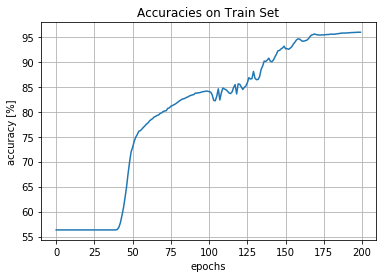

In [21]:
accuracies_train = [x[0] for x in mlp.accuracies]

fig, ax = plt.subplots()
ax.plot(accuracies_train)

ax.set(xlabel='epochs', ylabel='accuracy [%]', title='Accuracies on Train Set')
ax.grid()

plt.show()

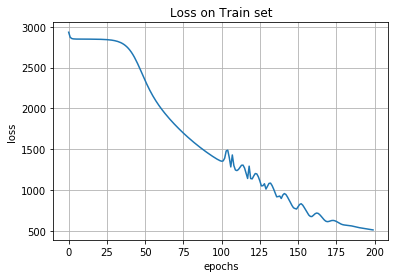

In [22]:
loss_train = [x[0] for x in mlp.losses]

fig, ax = plt.subplots()
ax.plot(loss_train)

ax.set(xlabel='epochs', ylabel='loss', title='Loss on Train set')
ax.grid()

plt.show()

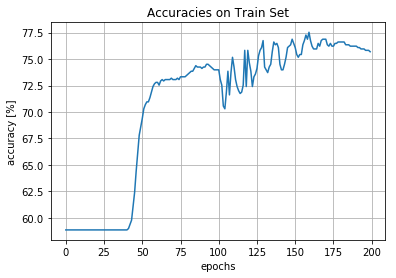

In [23]:
accuracies_test = [x[1] for x in mlp.accuracies]

fig, ax = plt.subplots()
ax.plot(accuracies_test)

ax.set(xlabel='epochs', ylabel='accuracy [%]', title='Accuracies on Train Set')
ax.grid()

plt.show()

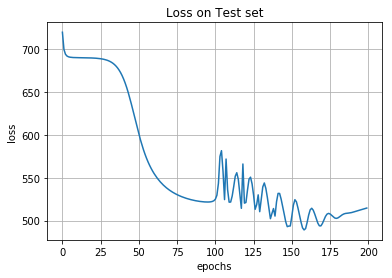

In [24]:
loss_test = [x[1] for x in mlp.losses]

fig, ax = plt.subplots()
ax.plot(loss_test)

ax.set(xlabel='epochs', ylabel='loss', title='Loss on Test set')
ax.grid()

plt.show()